In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

### <b>Read the data</b>

In [62]:
df = pd.read_csv('../../data/processed/canomical_data.csv')
df.head()

,p_category,p_brand,p_day_created,p_sold_quantity,p_original_price,p_current_price,p_discount_rate,p_categories
0,Bình giữ nhiệt,0.518395,659.0,702,528000,269000,49,0.046053
1,Nhà Cửa - Đời Sống,0.662207,974.0,12844,799000,429000,46,0.552632
2,Nhà Cửa - Đời Sống,0.642140,1372.0,938,209000,209000,0,0.552632
3,Bình giữ nhiệt,0.518395,593.0,10359,473000,235000,50,0.046053
4,Bộ ga,0.484950,529.0,2338,106000,89000,16,0.098684


### <b>Train test split</b>

In [43]:
X = df.drop('p_sold_quantity', axis='columns')
y = testLabels = df.p_sold_quantity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [44]:
y_train.value_counts()

0        83
1        33
2        22
4        20
6        17
         ..
289       1
203       1
18192     1
737       1
430       1
Name: p_sold_quantity, Length: 756, dtype: int64

In [45]:
y.value_counts()

0       102
1        41
2        29
4        23
3        21
       ... 
3351      1
2021      1
951       1
696       1
706       1
Name: p_sold_quantity, Length: 872, dtype: int64

In [46]:
104/89

1.1685393258426966

In [47]:
y_test.value_counts()

0       19
1        8
3        7
2        7
9        6
        ..
505      1
697      1
81       1
202      1
1175     1
Name: p_sold_quantity, Length: 269, dtype: int64

In [48]:
X_train.shape, X_test.shape

((1574, 6), (394, 6))

In [49]:
X_train[:10]

,p_brand,p_categories,p_day_created,p_original_price,p_current_price,p_discount_rate
1050,0.635179,0.141975,891.0,114000,114000,0
120,0.511401,0.283951,744.0,171000,99000,42
1704,0.804560,0.722222,455.0,320000,247000,23
1860,0.592834,0.925926,94.0,62000,62000,0
1448,0.794788,0.549383,810.0,1580000,1135000,28
1270,0.635179,0.240741,469.0,30000,30000,0
1184,0.635179,0.685185,398.0,145000,139000,4
99,0.403909,0.703704,48.0,9100000,6370000,30
1770,0.635179,0.179012,371.0,150000,75000,50
276,0.899023,0.154321,413.0,178000,126200,29


In [50]:
len(X_train.columns)

6

### <b>Use the model `LogisticRegression` to predict the target variable</b>

In [56]:
def confusion_matrix_plot(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

In [59]:
def log_reg(X_train, X_test, y_train, y_test, weights=-1):
    if weights == -1:
        model = LogisticRegression()
    else:
        model = LogisticRegression(class_weight={0: weights[0], 1: weights[1]})
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    print('Accuracy: ', accuracy)
   #  confusion_matrix_plot(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    return model

/home/tiendat57/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.04568527918781726


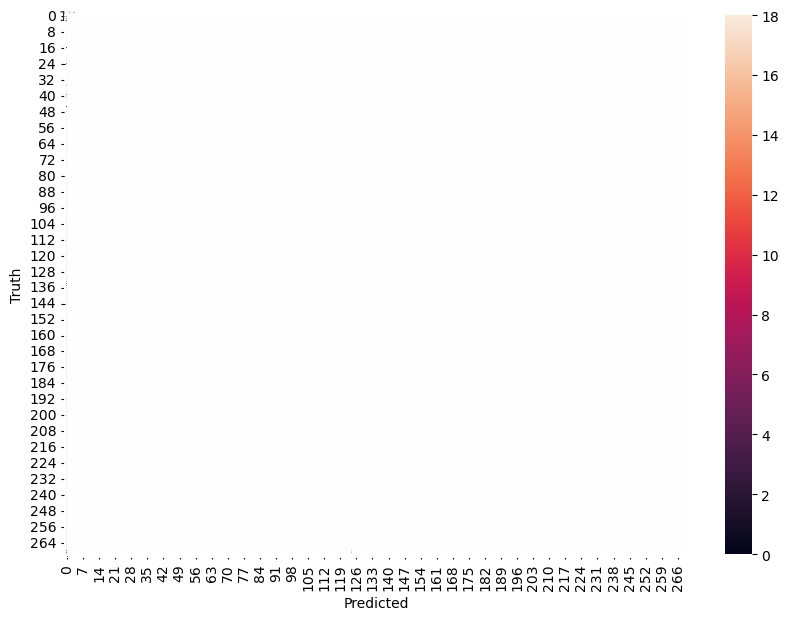

Classification Report:                precision    recall  f1-score   support

           0       0.07      0.95      0.12        19
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         3
          20       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         2
   

/home/tiendat57/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tiendat57/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tiendat57/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

LogisticRegression()

In [58]:
model = log_reg(X_train, X_test, y_train, y_test) 
model